105783


(array([8.93425258e-03, 3.88902706e-02, 1.01780393e-01, 1.63269109e-01,
        2.22130014e-01, 3.02888639e-01, 3.21633049e-01, 3.06567448e-01,
        3.32319114e-01, 3.47910258e-01, 3.60523319e-01, 3.35472379e-01,
        3.57019691e-01, 3.70158705e-01, 3.75238557e-01, 3.69807933e-01,
        4.05019394e-01, 4.17982356e-01, 4.67034126e-01, 4.55120772e-01,
        4.72990300e-01, 5.30800225e-01, 4.92609550e-01, 4.90333277e-01,
        4.81047590e-01, 4.82625287e-01, 5.52521522e-01, 5.92989691e-01,
        5.45689455e-01, 5.59354825e-01, 5.16959737e-01, 6.06829036e-01,
        5.25368435e-01, 5.07150710e-01, 4.72463711e-01, 3.90129406e-01,
        3.49662459e-01, 3.61049262e-01, 2.99208838e-01, 2.63648297e-01,
        2.20378443e-01, 1.84115854e-01, 1.45575260e-01, 1.48553990e-01,
        1.25430020e-01, 1.09313314e-01, 8.88166750e-02, 7.56784480e-02,
        7.05981818e-02, 6.74449131e-02, 5.83352126e-02, 6.60434604e-02,
        7.98828062e-02, 1.05459319e-01, 9.72257838e-02, 1.112398

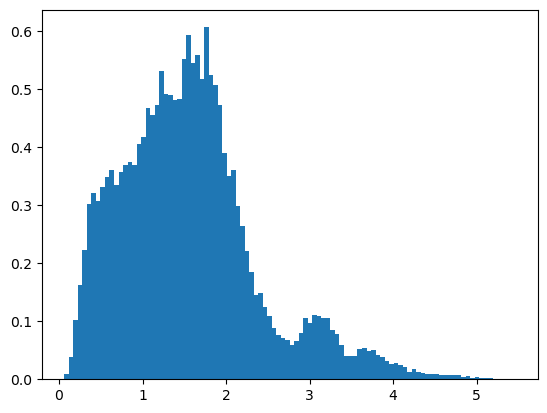

In [383]:
from astroML.datasets import fetch_dr7_quasar
import numpy as np
from matplotlib import pyplot as plt
import random as rd

# Fetch the quasar data
data = fetch_dr7_quasar()

# select the first n_data points
n_bin = 100

z = data['redshift']
n_data = len(z)
print(n_data)
plt.hist(z, bins = n_bin, density = True)

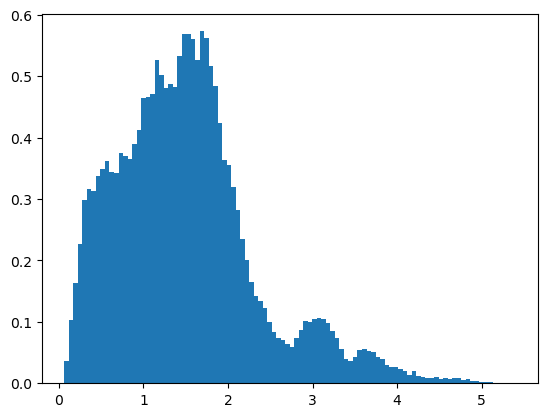

In [384]:

N = 1000000
matrix_data = np.histogram(z,bins = n_bin, density = True)
freq = matrix_data[0]
signal = matrix_data[1]
xmin = signal.min()
xmax = signal.max()
ymin = freq.min()
ymax = freq.max()

x = np.random.uniform(low=xmin, high=xmax, size=(N,))
y = np.random.uniform(low=ymin, high=ymax, size=(N,))
data_gen = np.array([y])
data_gen = np.append(data_gen, [x], axis = 0)

x_acc = np.array(())
length = 0
for i in range(1,n_bin):
    xy_bin = data_gen[:,(data_gen[1]>=signal[i-1])&(data_gen[1]<signal[i])&(data_gen[0]<=freq[i])]
    x_acc = np.append(x_acc, xy_bin[1])

plt.hist(x_acc, bins = n_bin, density = True)

plt.show()



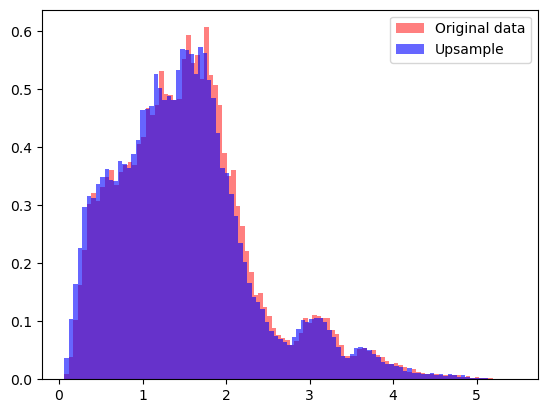

In [385]:
fig, ax = plt.subplots()
ax.hist(z, bins = n_bin, density = True, color = 'r',alpha=0.5, label = 'Original data')
ax.hist(x_acc, bins = n_bin, density = True, color = 'b', alpha=0.6, label = 'Upsample')

# Aggiungere la legenda
ax.legend(loc="upper right")

plt.show()